In order to perform gradient descent across a neural network, one needs to keep track of all the values in the nodes, and all of the partial derrivatives. For this reason a `Value` class is created, which takes on a tree structure. 

The visualize this tree structure `graphviz` is used. In addition to installing the python package graphviz, the standalone software of graphviz also needs to be installed:

```
brew install graphviz
```

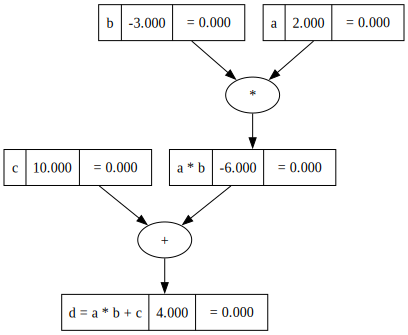

In [2]:
from visualization import draw_diagram
from value import Value 


a = Value(2, 'a')
b = Value(-3, 'b')
c = Value(10, 'c')

d = a*b + c; d.symbol='d'
draw_diagram(d, 'TB')

The gradient $∇$ of each value is simply the partial derrivative of that value with respect to the total/final value. For example the gradient of $c$ is the partial derrivative of $d$ with respect to $c$

$$ ∇_c  = \frac{\partial d}{\partial c} $$

For values further down the tree the chain rule can be used. In the case of finding the gradient of $a$, the product of $a$ and $b$ can be considered as a `Value` $ab$

$$ \frac{\partial d}{\partial a} = \frac{\partial d}{\partial ab} \frac{\partial ab}{\partial a}$$

The chain rule always depends on the current operation and the operation that follows the current operation, which means one can start at the final value $d$ and fill in the gradient values going back down the tree


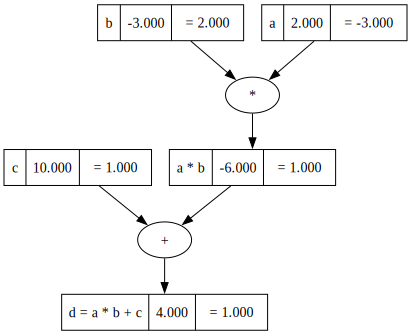

In [3]:
d.back_propogate()
draw_diagram(d, 'TB')


The `Value` class is used inside the `MLP` (multi-layer perceptron) class. This neural network can be be trained using training data `x_train` and `y_train`, after which it is able to predict any new value in the same shape as the original training data. 

In [15]:
from mlp import MLP

xs = [
    [2.,  3., -1.],
    [3., -1.,  .5],
    [.5,  1.,  1.],
    [1.,  1., -1.],
]

ys = [1., -1., -1., 1.]

network = MLP(xs, ys, hidden_layer_sizes=[4, 4])
network.train(thresehold=0.001)

network.predict(xs)

[Value(0.9807814467227215),
 Value(-0.9999978273083836),
 Value(-0.9999992451645908),
 Value(0.9806009395644962)]

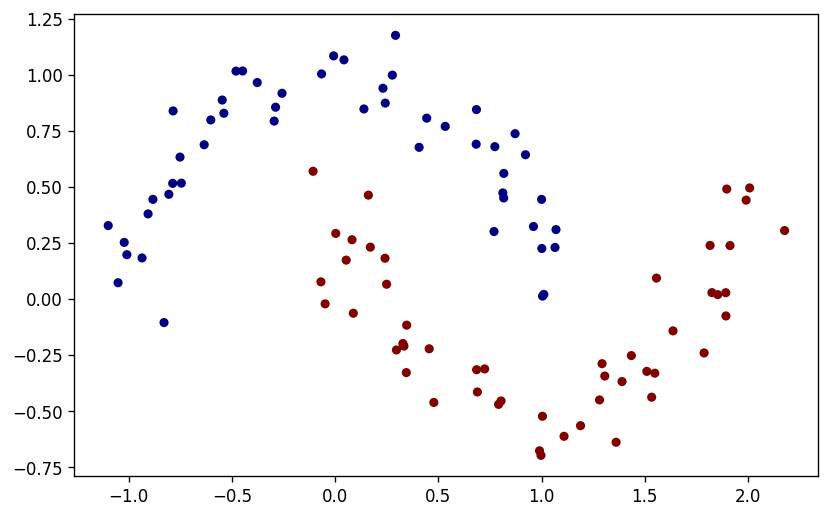

In [16]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = make_moons(n_samples=100, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.33,     # proportion of data that goes into the test set
    random_state=42
) 

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(8,5), dpi=120)
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [19]:
# 2 layer neural network
model = MLP(X_train, y_train, hidden_layer_sizes=[16, 16])
model.train()

# X_train


array([[-0.90666268,  0.38038133],
       [ 0.08162889,  0.26515623],
       [ 0.33324698, -0.20887763],
       [-0.88310011,  0.44516194],
       [ 1.82560026,  0.02929992],
       [-0.04869143, -0.0207546 ],
       [ 1.3900989 , -0.36699246],
       [-0.78738275,  0.51654061],
       [-0.48063603,  1.01682727],
       [ 0.76975642,  0.30185009],
       [ 1.53363811, -0.4368932 ],
       [ 1.00135417,  0.22613354],
       [ 2.17778893,  0.30611302],
       [ 1.06528237,  0.2308263 ],
       [ 0.27706352,  0.99907499],
       [ 0.99032395, -0.67574379],
       [-0.63474164,  0.68869451],
       [ 0.53327316,  0.77048744],
       [ 1.00025771,  0.44504972],
       [ 0.77374533,  0.68004503],
       [ 0.40678049,  0.67709011],
       [ 1.51036983, -0.32172243],
       [-0.54735332,  0.88794977],
       [-0.80607225,  0.46770174],
       [ 0.96082304,  0.32417448],
       [ 0.08795623, -0.06250352],
       [ 0.81719124,  0.56083773],
       [ 0.79181278, -0.46877356],
       [ 0.05347452,